# How to use PCA for reduce dimension

In [1]:
# download the dataset from kaggle
# https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('./Mnist_train.csv')

print(d0.head(5))

# copy the label of data in l

l = d0['label']

# drop the label and store only pixel data in data

data = d0.drop("label", axis = 1)





   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
print(data.shape)
print(l.shape)

(42000, 784)
(42000,)


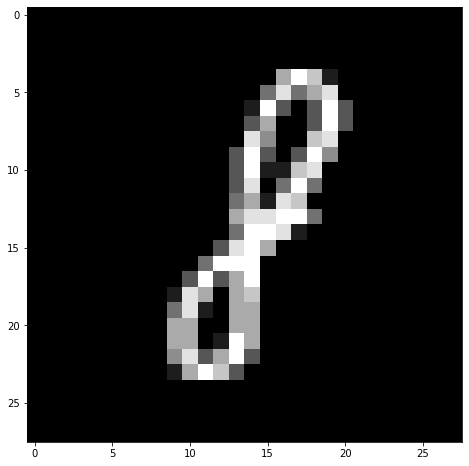

8


In [3]:
# plot a number
plt.figure(figsize = (8,8))
idx = 135

grid_data = data.iloc[idx].to_numpy().reshape(28,28)  # reshape the 784 data points from 1D to 28*28 2D (28*28 = 784)
plt.imshow(grid_data, interpolation = "none", cmap ="gray")
plt.show()

print(l[idx])

#  2D visualization of MNIST dataset using PCA

In [38]:
# pick first 15k data points for time efficiency

labels = l.head(15000)
Data = data.head(15000)

print("the shape of sample data:",Data.shape)

the shape of sample data: (15000, 784)


In [39]:
# Data preprocessing : Standardizing the data

from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(Data)
print(standardized_data.shape)

(15000, 784)


In [40]:
# find the co-variance matrix which is : A^T * A

sample_data = standardized_data

# matrix multiplication using numpy
cov_matrix = np.matmul(sample_data.T , sample_data)

print("the shape of the co-variance matrix:", cov_matrix.shape)

the shape of the co-variance matrix: (784, 784)


In [41]:
# let's find the top 2 eigenvalue and corresponding eigenvector 
# to convert in 2D

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value)
# eigh function will return eigenvalue in ascending order
# this code return top two eigenvalue (782,783)
values , vectors  = eigh(cov_matrix , eigvals=(782,783))

print("shape of eigenvector:", vectors.shape)
# converting the eigenvector in (2,d) form for easyness in computation
vectors = vectors.T

print("updated shape of eigenvector", vectors.shape)


shape of eigenvector: (784, 2)
updated shape of eigenvector (2, 784)


In [42]:
# projecting the original data sample on the plane formed by
# two principal eigen vectors by vector-vector multiplication

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print("resultanat new data points shape:",vectors.shape, "X", sample_data.shape, "=", new_coordinates.shape)

resultanat new data points shape: (2, 784) X (15000, 784) = (2, 15000)


In [43]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels))

new_coordinates = new_coordinates.T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data = new_coordinates, columns=("1st_principal","2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


/home/abhishek/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


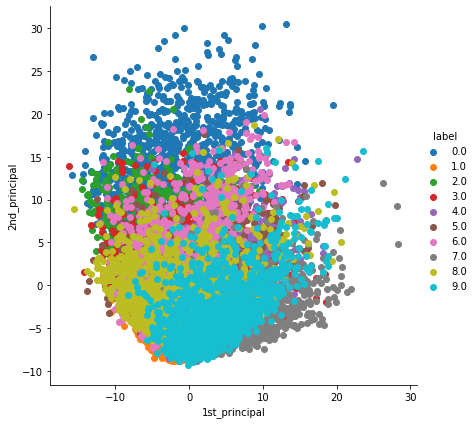

In [44]:
# ploting the 2nd data points with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue="label",size =6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [48]:
# initializing the pca
from sklearn import decomposition

pca = decomposition.PCA()

In [49]:
# configuring the parameters
# the numbers of components = 2

pca.n_components = 2
pca_data = pca.fit_transform(sample_data) # sample_data is already standardized

# pca_reduced will contain the 2-d projects of sample data

print("shape of pca_reduced:", pca_data.shape)

shape of pca_reduced: (15000, 2)


/home/abhishek/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


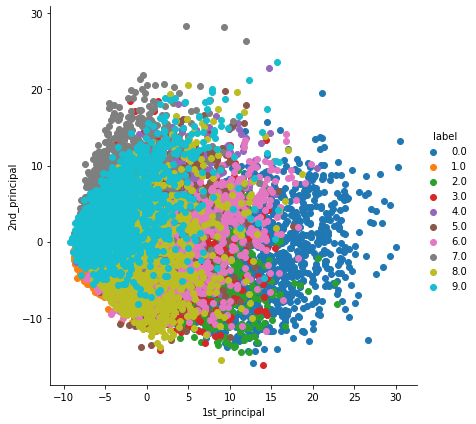

In [50]:
# attaching the label for each 2-d data points
pca_data = np.vstack((pca_data.T, labels))
pca_data = pca_data.T

# creating new data fram

pca_df = pd.DataFrame(data = pca_data, columns=("1st_principal","2nd_principal", "label"))
sns.FacetGrid(pca_df, hue = "label", size =6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()